# Model to predict Risk Type for the Facilities


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot
import datetime
import warnings

In [3]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# file_name = 'Food_Inspections.csv'
df = pd.read_csv('/content/drive/MyDrive/Final_Project_602/Food_Inspections.csv')

In [6]:
# Displaying the first few rows of the DataFrame
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2586057,ANGELINA RISTORANTE,ANGELINA RISTORANTE,14788.0,Restaurant,Risk 1 (High),3561 N BROADWAY,CHICAGO,IL,60657.0,11/30/2023,Canvass Re-Inspection,Pass,NaN,41.947205,-87.647027,"(41.94720549468551, -87.64702664696026)"
1,2586039,RIVERSIDE MARKET,RIVERSIDE MARKET,2934974.0,Grocery Store,Risk 1 (High),1240 N HALSTED ST,Chicago,IL,60642.0,11/30/2023,License,Not Ready,NaN,41.904707,-87.648270,"(41.904706963144406, -87.64827036474287)"
2,2586041,RIVERSIDE MARKET,RIVERSIDE MARKET,2934975.0,Grocery Store,Risk 3 (Low),1240 N HALSTED ST,Chicago,IL,60642.0,11/30/2023,License,Not Ready,NaN,41.904707,-87.648270,"(41.904706963144406, -87.64827036474287)"
3,2586011,PILSEN YARDS,PILSEN YARDS/THE ALDERMAN,2548908.0,Restaurant,Risk 1 (High),1159-1163 W 18TH ST,CHICAGO,IL,60608.0,11/29/2023,Canvass Re-Inspection,Fail,60. PREVIOUS CORE VIOLATION CORRECTED - Commen...,41.857859,-87.655509,"(41.8578590994683, -87.65550935859257)"
4,2585952,MS. B'S KITCHEN & CATERING LLC,MS. B'S KITCHEN & CATERING,2631695.0,Restaurant,Risk 1 (High),4203 W CERMAK RD,CHICAGO,IL,60623.0,11/29/2023,Canvass,Out of Business,NaN,41.851366,-87.729766,"(41.8513662093141, -87.72976631700914)"


# Data Cleaning and Preparation

As a part of Data Preparation for Modelling, removing the unnecessary fields from data

In [7]:
# Get unique values in the "Results" column
risk_unique = df['Risk'].unique()

# Print the unique values
print("Unique Results:", risk_unique)

Unique Results: ['Risk 1 (High)' 'Risk 3 (Low)' 'All' 'Risk 2 (Medium)' nan]


In [8]:
columns_to_drop = ['Violations', 'DBA Name', 'AKA Name','Address','City','State','Zip','Inspection Date','Latitude','Longitude','Location','License #','Inspection ID', 'Results']

df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.head()

,Facility Type,Risk,Inspection Type
0,Restaurant,Risk 1 (High),Canvass Re-Inspection
1,Grocery Store,Risk 1 (High),License
2,Grocery Store,Risk 3 (Low),License
3,Restaurant,Risk 1 (High),Canvass Re-Inspection
4,Restaurant,Risk 1 (High),Canvass


In [10]:
df=df.dropna()
df.isna().sum()

Facility Type      0
Risk               0
Inspection Type    0
dtype: int64

# Label Encoding

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

column_name = 'Risk'  # Replace with the actual column name

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the specified column
df['Final_Risk_Results'] = label_encoder.fit_transform(df[column_name])

# Creating a mapping between the original names and their label-encoded values
label_mapping = pd.DataFrame({
    'Original': df[column_name].unique(),
    'LabelEncoded': df['Final_Risk_Results'].unique()
})

# Display the modified DataFrame
print(df)

# Display the label mapping
print(label_mapping)

         Facility Type           Risk        Inspection Type  \
0           Restaurant  Risk 1 (High)  Canvass Re-Inspection   
1        Grocery Store  Risk 1 (High)                License   
2        Grocery Store   Risk 3 (Low)                License   
3           Restaurant  Risk 1 (High)  Canvass Re-Inspection   
4           Restaurant  Risk 1 (High)                Canvass   
...                ...            ...                    ...   
264025  Long Term Care  Risk 1 (High)                Canvass   
264026      Restaurant  Risk 1 (High)  Canvass Re-Inspection   
264027      Restaurant  Risk 1 (High)                Canvass   
264028      Restaurant  Risk 1 (High)                Canvass   
264029          Liquor   Risk 3 (Low)  License Re-Inspection   

        Final_Risk_Results  
0                        1  
1                        1  
2                        3  
3                        1  
4                        1  
...                    ...  
264025                   1  

In [12]:
df.drop('Risk',axis=1,inplace=True)

In [13]:
df

,Facility Type,Inspection Type,Final_Risk_Results
0,Restaurant,Canvass Re-Inspection,1
1,Grocery Store,License,1
2,Grocery Store,License,3
3,Restaurant,Canvass Re-Inspection,1
4,Restaurant,Canvass,1
...,...,...,...
264025,Long Term Care,Canvass,1
264026,Restaurant,Canvass Re-Inspection,1
264027,Restaurant,Canvass,1
264028,Restaurant,Canvass,1


In [14]:
column_name = 'Final_Risk_Results'

# Get the number of unique values
num_unique_values = df[column_name].nunique()

# Get the unique values and their counts
unique_values_counts = df[column_name].value_counts()

# Print the number of unique values
print(f'Number of unique values in the column "{column_name}": {num_unique_values}')

# Print the unique values and their counts
print('\nUnique values and their counts:')
print(unique_values_counts)


Number of unique values in the column "Final_Risk_Results": 4

Unique values and their counts:
1    192129
2     48579
3     18170
0        19
Name: Final_Risk_Results, dtype: int64


In [15]:
df=pd.get_dummies(df, prefix=['Facility Type','Inspection Type'])

In [16]:
y=df['Final_Risk_Results']
df.drop(['Final_Risk_Results'],axis=1,inplace=True)
X=df

# Dimensionality Reduction

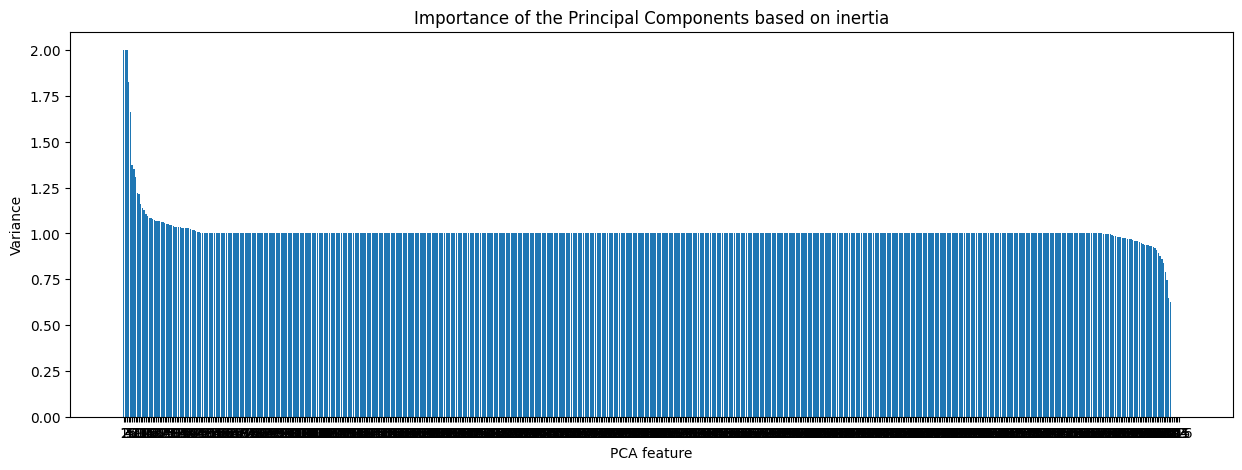

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Standardize and scale the dataset and applying PCA using a pipeline
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

# Plotting the principal components against their inertia
features = range(1, pca.n_components_ + 1)
plt.figure(figsize=(15, 5))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Importance of the Principal Components based on inertia")
plt.show()



In [18]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.85)
X_pca = pca.fit_transform(X)

# Print the shape of the data after applying PCA
print("Shape of data frame after applying PCA:", X_pca.shape)

# Print the total number of components after applying PCA
print("Total number of components after applying PCA:", len(pca.components_))

Shape of data frame after applying PCA: (258897, 8)
Total number of components after applying PCA: 8


# Splitting Test and Train Data

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (207117, 8)
Shape of X_test: (51780, 8)
Shape of y_train: (207117,)
Shape of y_test: (51780,)


# Finding the best model

In [19]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Results DataFrame for Decision Tree
dt_results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score'])

# Function to perform GridSearchCV and evaluate the model
def evaluate_dt_model():
    grid = GridSearchCV(dt_classifier, dt_param_grid, cv=5, scoring='f1_weighted')
    grid.fit(X_train, y_train)

    train_predictions = grid.predict(X_train)
    test_predictions = grid.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_f1_score = f1_score(y_train, train_predictions, average='weighted')
    test_f1_score = f1_score(y_test, test_predictions, average='weighted')

    dt_results_df.loc[len(dt_results_df)] = ['Decision Tree', train_accuracy, test_accuracy, train_f1_score, test_f1_score]

# Evaluate Decision Tree
evaluate_dt_model()

# Display the results for Decision Tree
print(dt_results_df)


           Model  Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score
0  Decision Tree        0.781597        0.78005         0.74297       0.740982


In [20]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the reduced parameter grid for hyperparameter tuning
rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}

# Results DataFrame for Random Forest
rf_results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score'])

# Function to perform GridSearchCV and evaluate the model
def evaluate_rf_model():
    grid = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='f1_weighted')
    grid.fit(X_train, y_train)

    train_predictions = grid.predict(X_train)
    test_predictions = grid.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_f1_score = f1_score(y_train, train_predictions, average='weighted')
    test_f1_score = f1_score(y_test, test_predictions, average='weighted')

    rf_results_df.loc[len(rf_results_df)] = ['Random Forest', train_accuracy, test_accuracy, train_f1_score, test_f1_score]

# Evaluate Random Forest
evaluate_rf_model()

# Display the results for Random Forest
print(rf_results_df)


           Model  Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score
0  Random Forest        0.781544       0.780301        0.742959        0.74128


In [21]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the reduced parameter grid for hyperparameter tuning
xgb_param_grid = {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}

# Results DataFrame for XGBoost
xgb_results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score'])

# Function to perform GridSearchCV and evaluate the model
def evaluate_xgb_model():
    grid = GridSearchCV(xgb_classifier, xgb_param_grid, cv=5, scoring='f1_weighted')
    grid.fit(X_train, y_train)

    train_predictions = grid.predict(X_train)
    test_predictions = grid.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_f1_score = f1_score(y_train, train_predictions, average='weighted')
    test_f1_score = f1_score(y_test, test_predictions, average='weighted')

    xgb_results_df.loc[len(xgb_results_df)] = ['XGBoost', train_accuracy, test_accuracy, train_f1_score, test_f1_score]

# Evaluate XGBoost
evaluate_xgb_model()

# Display the results for XGBoost
print(xgb_results_df)


     Model  Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score
0  XGBoost        0.773655       0.774508        0.730852       0.731887
